<a href="https://colab.research.google.com/github/IndraLukasTjahaja/Digital_Credit_Risk/blob/main/Bab_2_3_2_Data_Understanding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [173]:
# 2.3.2.1 Persiapan data dan impor ke Python

In [174]:
# 2.3.2.2 Impor data di Python

# library panda untuk menggunakan data frame
import pandas as pd

# Impor data dari excel xls ke Python
# Pembaca dapat langsung menunjuk kepada file excel yang terletak di website pendamping buku ini
# atau mengunduh terlebih dahulu dan menunjuk ke file excel di lokasi hard drive
# contoh: df = pd.read_excel('C:\User\pembaca\downloads\Credit_Scoring_Dataset.xlsx')

df = pd.read_excel('https://github.com/IndraLukasTjahaja/Digital_Credit_Risk/raw/main/Credit_Scoring_Dataset.xlsx')

In [175]:
# 2.3.2.3 Struktur data

# Melihat sample dari dataset
df.head(10) # Menampilkan 10 baris teratas dari dataframe df

,ID,gagal_bayar,Lama_Cicilan,Tujuan_Pinjaman,Jumlah_Pinjaman,Pekerjaan,Pendapatan_perbulan,Lama_Bekerja,Status,Kepemilikan_Rumah,Alamat_Rumah,Alamat_Kantor,Usia,Lama_tinggal_ditempat_sekarang,SLIK_Kolektibilitas,SLIK_Cicilan_Bulanan,SLIK_Outstanding_CC,API_CreditScore_Vendor_A,API_CreditScore_Vendor_B,Device_Type,Device_Apps_Installed,Device_Active_Since,Device_Apps_Segmentation,Mobile_Provider,Mobile_Number_Active_Since,Email_Domain_Type
0,ABC0001,0_Bayar,1,peralatan_rumahtangga,500000,1_pegawai_tetap,5. >20 juta,5_>7_tahun_kerja,2_menikah,1_milik_sendiri,Daerah_3,Daerah_3,67.0,4_>10_tahun,1.0,4.679660e+06,0.0,305,192,Android,16,2_1_ke_3_tahun,Social_Media,Telco_A,1_Kurang_1_bulan,Public_Domain
1,ABC0003,0_Bayar,2,liburan,1000000,3_wiraswasta,1. < 1 juta,4_4-7_tahun_kerja,2_menikah,1_milik_sendiri,Daerah_2,Daerah_1,49.0,3_5-10_tahun,1.0,2.293974e+06,0.0,858,97,Android,108,3_Lebih_3_tahun,Games,Telco_A,2_Kurang_1_tahun,Public_Domain
2,ABC0010,1_Gagal,5,barang_baru,500000,4_tidak_bekerja,1. < 1 juta,1_tidak_bekerja,3_bercerai,1_milik_sendiri,Daerah_2,Daerah_2,28.0,2_1-5_tahun,1.0,2.331354e+06,0.0,254,285,Android,51,3_Lebih_3_tahun,Social_Media,Telco_C,1_Kurang_1_bulan,Public_Domain
3,ABC0014,1_Gagal,4,barang_baru,500000,3_wiraswasta,1. < 1 juta,5_>7_tahun_kerja,2_menikah,1_milik_sendiri,Daerah_3,Daerah_2,60.0,4_>10_tahun,1.0,3.226113e+06,0.0,915,95,Android,22,3_Lebih_3_tahun,Productivity,Telco_D,1_Kurang_1_bulan,Public_Domain
4,ABC0017,0_Bayar,4,peralatan_rumahtangga,1000000,1_pegawai_tetap,5. >20 juta,5_>7_tahun_kerja,2_menikah,1_milik_sendiri,Daerah_4,Daerah_3,53.0,4_>10_tahun,1.0,4.667793e+06,0.0,837,231,IOS,81,3_Lebih_3_tahun,Games,Telco_C,4_2_ke_5_tahun,Public_Domain
5,ABC0021,0_Bayar,2,barang_baru,1000000,1_pegawai_tetap,1. < 1 juta,3_1-4_tahun_kerja,2_menikah,1_milik_sendiri,Daerah_3,Daerah_3,48.0,4_>10_tahun,1.0,3.518565e+05,0.0,720,63,Android,106,2_1_ke_3_tahun,Games,Telco_A,1_Kurang_1_bulan,Public_Domain
6,ABC0023,0_Bayar,2,barang_baru,1000000,3_wiraswasta,1. < 1 juta,2_<1_tahun_kerja,2_menikah,2_sewa,Daerah_1,Daerah_3,48.0,3_5-10_tahun,1.0,4.551689e+06,0.0,576,119,Android,69,1_Kurang_1_tahun,Games,Telco_A,3_1_ke_2_tahun,Public_Domain
7,ABC0024,0_Bayar,2,barang_bekas,500000,1_pegawai_tetap,2. 1 - 5 juta,2_<1_tahun_kerja,2_menikah,1_milik_sendiri,Daerah_2,Daerah_2,44.0,4_>10_tahun,1.0,1.918335e+06,0.0,116,173,Android,35,3_Lebih_3_tahun,Productivity,Telco_A,5_Lebih_5_tahun,Public_Domain
8,ABC0025,0_Bayar,2,elektronik,1000000,1_pegawai_tetap,5. >20 juta,3_1-4_tahun_kerja,3_bercerai,1_milik_sendiri,Daerah_4,Daerah_1,26.0,1_<1_tahun,1.0,3.521921e+06,0.0,730,333,Android,97,2_1_ke_3_tahun,Games,Telco_B,1_Kurang_1_bulan,Public_Domain
9,ABC0034,0_Bayar,2,buka_bisnis,500000,3_wiraswasta,5. >20 juta,5_>7_tahun_kerja,2_menikah,2_sewa,Daerah_1,Daerah_4,57.0,4_>10_tahun,1.0,4.269425e+05,0.0,246,198,Android,75,3_Lebih_3_tahun,Social_Media,Telco_B,1_Kurang_1_bulan,Public_Domain


In [176]:
# Melihat penjelasan singkat dan tipe data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   ID                              999 non-null    object 
 1   gagal_bayar                     991 non-null    object 
 2   Lama_Cicilan                    1000 non-null   int64  
 3   Tujuan_Pinjaman                 995 non-null    object 
 4   Jumlah_Pinjaman                 1000 non-null   int64  
 5   Pekerjaan                       987 non-null    object 
 6   Pendapatan_perbulan             989 non-null    object 
 7   Lama_Bekerja                    972 non-null    object 
 8   Status                          995 non-null    object 
 9   Kepemilikan_Rumah               996 non-null    object 
 10  Alamat_Rumah                    1000 non-null   object 
 11  Alamat_Kantor                   1000 non-null   object 
 12  Usia                            998

In [177]:
# 2.3.2.4 Tipe data

# Merubah tipe data menjadi tipe karakter kategori
df['ID'] = df.ID.astype('category')
df['gagal_bayar'] = df.gagal_bayar.astype('category')
df['Pekerjaan'] = df.Pekerjaan.astype('category')
df['Tujuan_Pinjaman'] = df.Tujuan_Pinjaman.astype('category')
df['Pendapatan_perbulan'] = df.Pendapatan_perbulan.astype('category')
df['Lama_Bekerja'] = df.Lama_Bekerja.astype('category')
df['Status'] = df.Status.astype('category')
df['Kepemilikan_Rumah'] = df.Kepemilikan_Rumah.astype('category')
df['Alamat_Rumah'] = df.Alamat_Rumah.astype('category')
df['Alamat_Kantor'] = df.Alamat_Kantor.astype('category')
df['Lama_tinggal_ditempat_sekarang'] = df.Lama_tinggal_ditempat_sekarang.astype('category')
df['Device_Type'] = df.Device_Type.astype('category')
df['Device_Active_Since'] = df.Device_Active_Since.astype('category')
df['SLIK_Kolektibilitas'] = df.SLIK_Kolektibilitas.astype('category')
df['Device_Apps_Segmentation'] = df.Device_Apps_Segmentation.astype('category')
df['Mobile_Provider'] = df.Mobile_Provider.astype('category')
df['Mobile_Number_Active_Since'] = df.Mobile_Number_Active_Since.astype('category')
df['Email_Domain_Type'] = df.Email_Domain_Type.astype('category')

# Merubah tipe data menjadi tipe karakter int64
# Gunakan intger untuk angka bulat
df['API_CreditScore_Vendor_A'] = df.API_CreditScore_Vendor_A.astype('int64')
df['API_CreditScore_Vendor_B'] = df.API_CreditScore_Vendor_B.astype('int64')
df['Device_Apps_Installed'] = df.Device_Apps_Installed.astype('int64')

# Merubah tipe data menjadi tipe karakter float64
# Gunakan intger untuk angka dengan koma
# Jika dalam kolom tersebut terdapat null, maka harus di simpan dalam tipe float
df['Lama_Cicilan'] = df.Lama_Cicilan.astype('float64')
df['Usia'] = df.Usia.astype('float64')
df['Jumlah_Pinjaman'] = df.Jumlah_Pinjaman.astype('float64')
df['SLIK_Cicilan_Bulanan'] = df.SLIK_Cicilan_Bulanan.astype('float64')
df['SLIK_Outstanding_CC'] = df.SLIK_Outstanding_CC.astype('float64')

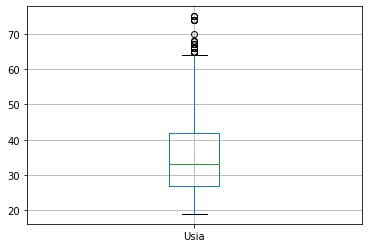

In [178]:
# 2.3.2.5.3 Mengidentifikasi outlier dan validitas data

df.boxplot(column=['Usia'])

In [179]:
# 2.3.2.5.4.1 Imputasi baris data yang kosong dengan asumsi nilai

# Koding berikut menggantikan missing value dari semua variabel dengan
# nilai yang paling sering muncul (modus) untuk variabel kategori dan nilai rata-rata untuk variabel numerik

# Memisahkan variabel kategori dengan variabel numerik
df_numerik = df.select_dtypes(include=['float64','int64','int'])
df_kategori = df.select_dtypes(exclude = ['float64','int64','int'])

for kolom in df_numerik.columns:
  df_numerik[kolom].fillna(df_numerik[kolom].mean(), inplace=True)

for kolom in df_kategori.columns:
  df_kategori[kolom].fillna(df_kategori[kolom].mode()[0], inplace=True)

# Menggabungkan dataset variabel kategori dan dengan variabel numerik
df_pembersihan_1 = pd.concat([df_numerik, df_kategori], axis = 1)

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4536: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [180]:
# 2.3.2.5.4.2 Tidak menggunakan baris data yang kosong (Drop Data)

# Menggunakan fungsi dropna() untuk menghapus semua baris yang memiliki data kosong
df_pembersihan_2 = df.dropna()

In [181]:
# 2.3.2.5.4.3 Tidak menggunakan kolom data yang kosong (Drop Variable)

# Menggunakan fungsi dropna() untuk menghapus kolom yang memiliki data kosong
df_pembersihan_3 = df.dropna(axis='columns')

In [182]:
# 2.3.2.5.4.4 Kategorikan data yang kosong (Flag)

# Koding berikut memberikan tanda flagging untuk baris data yang berisikan baris data kosong

# Memisahkan variabel kategori dengan variabel numerik
df_numerik = df.select_dtypes(include=['float64','int64','int'])
df_kategori = df.select_dtypes(exclude = ['float64','int64','int'])

for kolom in df_numerik.columns:
  # Membuat kolom baru untuk baris data yang kosong
  df_numerik[kolom+"_missing"] = df_numerik[kolom].isnull()
  df_numerik[kolom].fillna(0, inplace=True)

for kolom in df_kategori.columns:
  # Kolom kategori harus secara eksplisit menambahkan data kategori baru
  df_kategori[kolom] = df_kategori[kolom].cat.add_categories("00_Data_Kosong")
  df_kategori[kolom].fillna("00_Data_Kosong", inplace=True)

# Menggabungkan dataset variabel kategori dan dengan variabel numerik
df_pembersihan_4 = pd.concat([df_numerik, df_kategori], axis = 1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4536: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pyd

In [183]:
# Melanjutkan proses dengan asumsi bahwa baris data yang kosong tidak signifikan dan tidak akan terjadi baris data kosong lagi.
df_clean = df_pembersihan_2

In [221]:
df_clean.info()
# Untuk memudahkan membaca hasil, maka disimpan dalam bentuk csv dan didownload
from google.colab import files
df_clean.to_csv('df_clean.csv') 
files.download('df_clean.csv')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 946
Data columns (total 29 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   ID                              889 non-null    category
 1   gagal_bayar                     889 non-null    category
 2   Lama_Cicilan                    889 non-null    float64 
 3   Tujuan_Pinjaman                 889 non-null    category
 4   Pekerjaan                       889 non-null    category
 5   Pendapatan_perbulan             889 non-null    category
 6   Lama_Bekerja                    889 non-null    category
 7   Status                          889 non-null    category
 8   Kepemilikan_Rumah               889 non-null    category
 9   Alamat_Rumah                    889 non-null    category
 10  Alamat_Kantor                   889 non-null    category
 11  Usia                            889 non-null    float64 
 12  Lama_tinggal_ditempat_

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [185]:
# 2.3.2.5.5.1 EDA Analisa dasar variabel untuk gagal_bayar

# Untuk melihat frekuensi dari variabel gagal_bayar
print(df_clean['gagal_bayar'].value_counts())

# Untuk melihat proporsi (dalam persentase) dari variabel gagal_bayar
print(df_clean['gagal_bayar'].value_counts(normalize=True) * 100)

0_Bayar    638
1_Gagal    251
Name: gagal_bayar, dtype: int64
0_Bayar    71.766029
1_Gagal    28.233971
Name: gagal_bayar, dtype: float64


In [220]:
# 2.3.2.5.5.2 Exploratory Data Analysis untuk SLIK_Kolektabilitas

# Untuk melihat frekuensi dari variabel SLIK_Kolektabilitas
print(df_clean['SLIK_Kolektibilitas'].value_counts())

# Untuk melihat proporsi (dalam persentase) dari variabel SLIK_Kolektabilitas
print(df_clean['SLIK_Kolektibilitas'].value_counts(normalize=True) * 100)

3.0    477
1.0    269
2.0     82
5.0     47
4.0     14
Name: SLIK_Kolektibilitas, dtype: int64
3.0    53.655793
1.0    30.258718
2.0     9.223847
5.0     5.286839
4.0     1.574803
Name: SLIK_Kolektibilitas, dtype: float64


In [219]:
# Berapa banyak yang gagal bayar dari masing-masing nilai SLIK Kolektabilitas
print(pd.crosstab(df_clean['SLIK_Kolektibilitas'], df_clean['gagal_bayar']))

# dalam proporsi persentase
print(pd.crosstab(df_clean['SLIK_Kolektibilitas'],df_clean['gagal_bayar'],normalize='index',)*100)

gagal_bayar          0_Bayar  1_Gagal
SLIK_Kolektibilitas                  
1.0                      228       41
2.0                       57       25
3.0                      327      150
4.0                        6        8
5.0                       20       27
gagal_bayar            0_Bayar    1_Gagal
SLIK_Kolektibilitas                      
1.0                  84.758364  15.241636
2.0                  69.512195  30.487805
3.0                  68.553459  31.446541
4.0                  42.857143  57.142857
5.0                  42.553191  57.446809


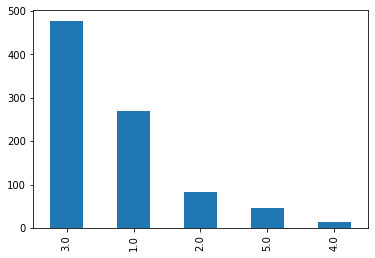

In [188]:
# 2.3.2.5.5.2 SLIK_Kolektibilitas Data Visualisasi

# Fungsi value_counts().plot(kind='bar')
df_clean['SLIK_Kolektibilitas'].value_counts().plot(kind='bar')

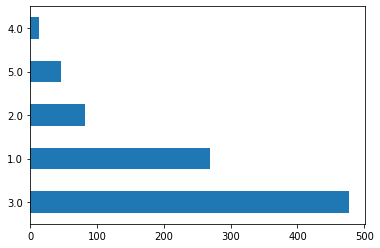

In [189]:
# Menampilkan plot bar secara horizontal
df_clean['SLIK_Kolektibilitas'].value_counts().plot(kind='barh')

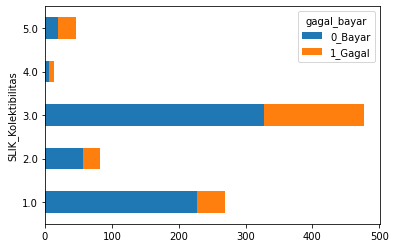

In [190]:
# Nilai variabel SLIK_Kolektibilitas dan proporsi default secara plot bar
pd.crosstab(df_clean['SLIK_Kolektibilitas'], df_clean['gagal_bayar']).plot(kind='barh', stacked=True)

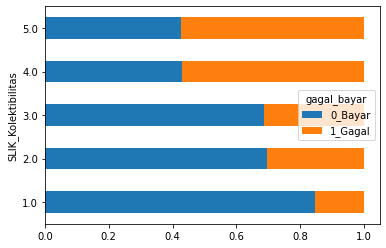

In [191]:
# Nilai variabel SLIK_Kolektibilitas dan proporsi default secara plot bar, secara proporsi
pd.crosstab(df_clean['SLIK_Kolektibilitas'], df_clean['gagal_bayar'], normalize='index').plot(kind='barh', stacked=True)

In [192]:
# 2.3.2.5.5.3 Exploratory Data Analysis untuk Usia

# Rangkuman statistik untuk variabel numerik Usia
print(df_clean['Usia'].describe())

# Rangkuman statistik untuk variabel numerik Usia, berdasarkan default (gagal bayar atau tidak)
df_clean.groupby('gagal_bayar')['Usia'].describe()

count    889.000000
mean      35.710911
std       11.440539
min       19.000000
25%       27.000000
50%       33.000000
75%       42.000000
max       75.000000
Name: Usia, dtype: float64


,count,mean,std,min,25%,50%,75%,max
gagal_bayar,,,,,,,,
0_Bayar,638.0,36.354232,11.383975,19.0,27.0,35.0,43.0,75.0
1_Gagal,251.0,34.075697,11.443699,19.0,25.0,31.0,40.0,74.0


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution Plot')

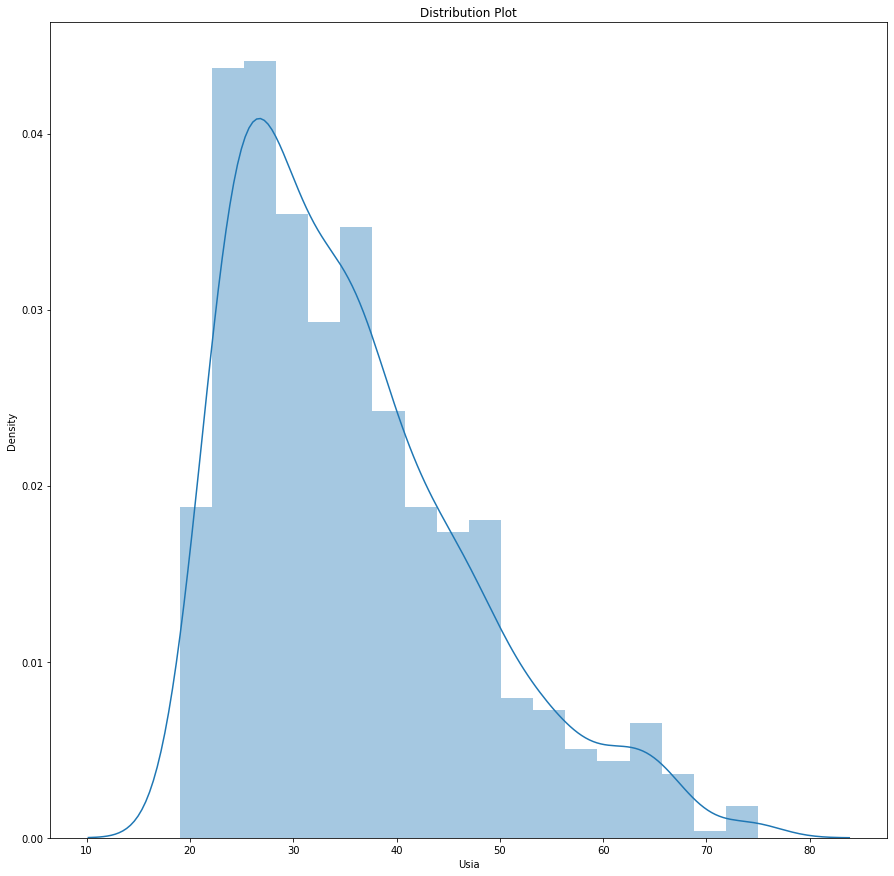

In [193]:
# Fungsi distplot() dari library seaborn
# Perhatikan bahwa distribusi plot harus tidak memiliki data kosong / missing value.
# Oleh karena itu harus menambahkan fungsi dropna() untuk secara sementara tidak
# mengikutsertakan missing value dalam pembuatan plot distribusi

import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(figsize=(15,15))
sns.distplot(df_clean['Usia'].dropna(), ax=ax).set_title('Distribution Plot')

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


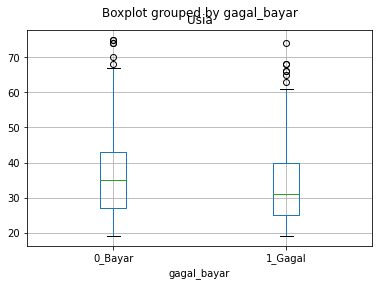

In [194]:
# Menambahkan by di fungsi boxplot untuk membagi boxplot berdasarkan gagal_bayar
df_clean.boxplot(by='gagal_bayar',column=['Usia'])

In [195]:
import numpy as np

# Untuk dapat melakukan analisa statistik, harus mengubah variabel gagal_bayar dari string menjadi angka (integer)
# Mengubah target variabel gagal_bayar menjadi angka 0 dan 1
conditions = [
             df_clean['gagal_bayar'] == '1_Gagal', 
             df_clean['gagal_bayar'] == '0_Bayar'
             ]

choices     = [
             1,
             0
             ]
df_clean['default'] = np.select(conditions,choices, default = 0)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [196]:
# Menghitung korelasi antara variabel API_CreditScore_Vendor_Adengan default
print(df_clean['default'].corr(df_clean['Usia']))

-0.08970135786883077


In [197]:
from scipy import stats

# Uji coba hipotesis apakah ada perbedaan nilai rata-rata variabel 
# API_CreditScore_Vendor_A dengan default (gagal bayar dan tidak gagal bayar)
stats.ttest_ind( df_clean[df_clean.default == 0].Usia,
             	df_clean[df_clean.default == 1].Usia, nan_policy='omit')

Ttest_indResult(statistic=2.6823480769340255, pvalue=0.0074466986902131235)

In [198]:
# 2.3.2.5.6 Memahami korelasi antar variabel dan dengan target

# Korelasi Antar semua Variabel numerik
import seaborn as sns
corr = df_clean.corr()
corr

,Lama_Cicilan,Jumlah_Pinjaman,Usia,SLIK_Cicilan_Bulanan,SLIK_Outstanding_CC,API_CreditScore_Vendor_A,API_CreditScore_Vendor_B,Device_Apps_Installed,default
Lama_Cicilan,1.000000,0.541302,-0.048449,0.034171,0.053444,-0.042888,-0.052433,-0.017101,0.199501
Jumlah_Pinjaman,0.541302,1.000000,0.036001,0.005351,-0.000459,0.021987,-0.011107,-0.019922,0.115285
Usia,-0.048449,0.036001,1.000000,-0.046872,-0.109170,0.013616,0.018977,0.039842,-0.089701
SLIK_Cicilan_Bulanan,0.034171,0.005351,-0.046872,1.000000,0.347327,-0.044516,-0.069751,-0.040561,0.355454
SLIK_Outstanding_CC,0.053444,-0.000459,-0.109170,0.347327,1.000000,-0.087148,-0.090634,-0.090108,0.373545
API_CreditScore_Vendor_A,-0.042888,0.021987,0.013616,-0.044516,-0.087148,1.000000,-0.002517,0.025244,-0.036576
API_CreditScore_Vendor_B,-0.052433,-0.011107,0.018977,-0.069751,-0.090634,-0.002517,1.000000,0.003716,-0.157221
Device_Apps_Installed,-0.017101,-0.019922,0.039842,-0.040561,-0.090108,0.025244,0.003716,1.000000,-0.147242
default,0.199501,0.115285,-0.089701,0.355454,0.373545,-0.036576,-0.157221,-0.147242,1.000000


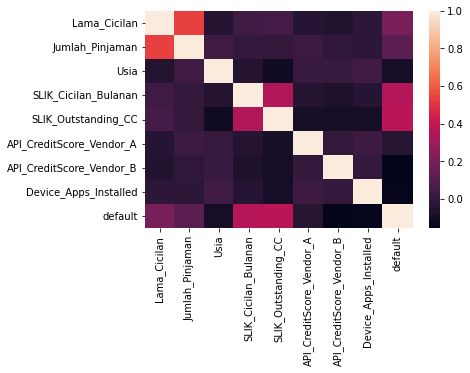

In [199]:
# Korelasi secara visualisasi
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values)

In [200]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 946
Data columns (total 27 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   ID                              889 non-null    category
 1   gagal_bayar                     889 non-null    category
 2   Lama_Cicilan                    889 non-null    float64 
 3   Tujuan_Pinjaman                 889 non-null    category
 4   Jumlah_Pinjaman                 889 non-null    float64 
 5   Pekerjaan                       889 non-null    category
 6   Pendapatan_perbulan             889 non-null    category
 7   Lama_Bekerja                    889 non-null    category
 8   Status                          889 non-null    category
 9   Kepemilikan_Rumah               889 non-null    category
 10  Alamat_Rumah                    889 non-null    category
 11  Alamat_Kantor                   889 non-null    category
 12  Usia                  

In [201]:
# 2.3.2.5.6.2 Memahami korelasi antar variabel independent 

# Memisahkan variabel kategori dengan variabel numerik
df_numerik = df_clean.select_dtypes(include=['float64','int64','int'])
df_kategori = df_clean.select_dtypes(exclude = ['float64','int64','int'])

# Menghapus kolom yang tidak berkaitan dengan korelasi antar variabel independent
df_kategori.drop(columns=['ID', 'gagal_bayar'], inplace=True)

from sklearn.feature_selection import chi2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.get_dummies(data = df_kategori)

# Kode Python berdasarkan referensi dari https://www.analyticsvidhya.com/blog/2021/06/decoding-the-chi-square-test%E2%80%8A-%E2%80%8Ause-along-with-implementation-and-visualization/
resultant = pd.DataFrame(data=[(0 for i in range(len(df.columns))) for i in range(len(df.columns))], 
                         columns=list(df.columns))
resultant.set_index(pd.Index(list(df.columns)), inplace = True)
for i in list(df.columns):
    for j in list(df.columns):
        if i != j:
            chi2_val, p_val = chi2(np.array(df[i]).reshape(-1, 1), np.array(df[j]).reshape(-1, 1))
            resultant.loc[i,j] = p_val
print(resultant)

# Untuk memudahkan membaca hasil, maka disimpan dalam bentuk csv dan didownload
from google.colab import files
df.to_csv('chi_square.csv') 
files.download('chi_square.csv')

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


                                            Tujuan_Pinjaman_TV  ...  Email_Domain_Type_Public_Domain
Tujuan_Pinjaman_TV                                    0.000000  ...                     4.874764e-02
Tujuan_Pinjaman_barang_baru                           0.142781  ...                     3.357240e-01
Tujuan_Pinjaman_barang_bekas                          0.326844  ...                     1.117741e-03
Tujuan_Pinjaman_buka_bisnis                           0.371774  ...                     6.733690e-03
Tujuan_Pinjaman_elektronik                            0.210968  ...                     1.951713e-01
...                                                        ...  ...                              ...
Mobile_Number_Active_Since_3_1_ke_2_tahun             0.228164  ...                     3.151883e-01
Mobile_Number_Active_Since_4_2_ke_5_tahun             0.189927  ...                     1.354120e-01
Mobile_Number_Active_Since_5_Lebih_5_tahun            0.610955  ...                     3.7

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [202]:
# Menghindari multikolinearitas antara Lama_Cicilan dan Jumlah_Pinjaman
df_clean.drop(columns=['Jumlah_Pinjaman'], inplace=True)

In [203]:
# 2.3.2.5.7.3 Penggunaan WOE dan IV dalam Scorecard
# Reference https://stackoverflow.com/questions/60892714/how-to-get-the-weight-of-evidence-woe-and-information-value-iv-in-python-pan

df_woe_iv = (pd.crosstab(df_clean['SLIK_Kolektibilitas'],df_clean['default'],normalize='columns')
             .assign(woe=lambda dfx: np.log(dfx[1] / dfx[0]))
             .assign(iv=lambda dfx: np.sum(dfx['woe']*
                                           (dfx[1]-dfx[0]))))

df_woe_iv

default,0,1,woe,iv
SLIK_Kolektibilitas,,,,
1.0,0.357367,0.163347,-0.782888,0.287479
2.0,0.089342,0.099602,0.108710,0.287479
3.0,0.512539,0.597610,0.153560,0.287479
4.0,0.009404,0.031873,1.220567,0.287479
5.0,0.031348,0.107570,1.232990,0.287479


In [204]:
conditions = [
             ( df_clean['SLIK_Kolektibilitas'] == 1 ),
             ( df_clean['SLIK_Kolektibilitas'] == 2 ) | ( df_clean['SLIK_Kolektibilitas'] == 3 ),
             ( df_clean['SLIK_Kolektibilitas'] == 4 ) | ( df_clean['SLIK_Kolektibilitas'] == 5 )
             ]

choices = [
          '1',
          '2&3',
          '4&5'
          ]

df_clean['SLIK_Kolektibilitas_Bin'] = np.select(conditions, choices)

df_woe_iv = (pd.crosstab(df_clean['SLIK_Kolektibilitas_Bin'],df_clean['default'],normalize='columns')
             .assign(woe=lambda dfx: np.log(dfx[1] / dfx[0]))
             .assign(iv=lambda dfx: np.sum(dfx['woe']*
                                           (dfx[1]-dfx[0]))))

df_woe_iv

default,0,1,woe,iv
SLIK_Kolektibilitas_Bin,,,,
1,0.357367,0.163347,-0.782888,0.287314
2&3,0.601881,0.697211,0.147029,0.287314
4&5,0.040752,0.139442,1.230137,0.287314


In [205]:
conditions = [
             ( df_clean['Usia'] <= 23 ),
             ( df_clean['Usia'] >= 24 ) & ( df_clean['Usia'] <= 26 ),
             ( df_clean['Usia'] >= 27 ) & ( df_clean['Usia'] <= 28 ),
             ( df_clean['Usia'] >= 29 ) & ( df_clean['Usia'] <= 31 ),
             ( df_clean['Usia'] >= 32 ) & ( df_clean['Usia'] <= 34 ),
             ( df_clean['Usia'] >= 35 ) & ( df_clean['Usia'] <= 37 ),
             ( df_clean['Usia'] >= 38 ) & ( df_clean['Usia'] <= 42 ),
             ( df_clean['Usia'] >= 43 ) & ( df_clean['Usia'] <= 48 ),
             ( df_clean['Usia'] >= 49 )
             ]

choices = [
          '1.<=23',
          '2.24-26',
          '3.27-28',
          '4.29-31',
          '5.32-34',
          '6.35-37',
          '7.38-42',
          '8.43-48',
          '9.>=49'
          ]
df_clean['Usia_Bin'] = np.select(conditions, choices)

print(pd.crosstab(df_clean['Usia_Bin'], df_clean['default']))

df_woe_iv = (pd.crosstab(df_clean['Usia_Bin'],df_clean['default'],normalize='columns')
             .assign(woe=lambda dfx: np.log(dfx[1] / dfx[0]))
             .assign(iv=lambda dfx: np.sum(dfx['woe']*
                                           (dfx[1]-dfx[0]))))

df_woe_iv

default    0   1
Usia_Bin        
1.<=23    58  38
2.24-26   77  43
3.27-28   58  21
4.29-31   69  29
5.32-34   55  26
6.35-37   80  16
7.38-42   78  26
8.43-48   66  23
9.>=49    97  29


default,0,1,woe,iv
Usia_Bin,,,,
1.<=23,0.090909,0.151394,0.510028,0.109118
2.24-26,0.120690,0.171315,0.350280,0.109118
3.27-28,0.090909,0.083665,-0.083035,0.109118
4.29-31,0.108150,0.115538,0.066075,0.109118
5.32-34,0.086207,0.103586,0.183649,0.109118
6.35-37,0.125392,0.063745,-0.676553,0.109118
7.38-42,0.122257,0.103586,-0.165727,0.109118
8.43-48,0.103448,0.091633,-0.121275,0.109118
9.>=49,0.152038,0.115538,-0.274530,0.109118


In [206]:
conditions = [
             ( df_clean['Usia'] <= 23 ),
             ( df_clean['Usia'] >= 24 ) & ( df_clean['Usia'] <= 26 ),
             ( df_clean['Usia'] >= 27 ) & ( df_clean['Usia'] <= 34 ),
             ( df_clean['Usia'] >= 35 )
             ]

choices = [
          '1.<=23',
          '2.24-26',
          '3.27-34',
          '4.>=35'
          ]
df_clean['Usia_Bin2'] = np.select(conditions, choices)

print(pd.crosstab(df_clean['Usia_Bin'], df_clean['default']))

df_woe_iv = (pd.crosstab(df_clean['Usia_Bin2'],df_clean['default'],normalize='columns')
             .assign(woe=lambda dfx: np.log(dfx[1] / dfx[0]))
             .assign(iv=lambda dfx: np.sum(dfx['woe']*
                                           (dfx[1]-dfx[0]))))

df_woe_iv

default    0   1
Usia_Bin        
1.<=23    58  38
2.24-26   77  43
3.27-28   58  21
4.29-31   69  29
5.32-34   55  26
6.35-37   80  16
7.38-42   78  26
8.43-48   66  23
9.>=49    97  29


default,0,1,woe,iv
Usia_Bin2,,,,
1.<=23,0.090909,0.151394,0.510028,0.087607
2.24-26,0.120690,0.171315,0.350280,0.087607
3.27-34,0.285266,0.302789,0.059612,0.087607
4.>=35,0.503135,0.374502,-0.295261,0.087607


In [207]:
df_score_manual = df_clean[['SLIK_Kolektibilitas_Bin','default']]

conditions = [
             ( df_clean['SLIK_Kolektibilitas'] == 1 ),
             ( df_clean['SLIK_Kolektibilitas'] == 2 ) | ( df_clean['SLIK_Kolektibilitas'] == 3 ),
             ( df_clean['SLIK_Kolektibilitas'] == 4 ) | ( df_clean['SLIK_Kolektibilitas'] == 5 )
             ]
choices = [
          -0.801299,
          0.152287,
          1.223173
          ]

df_score_manual['SLIK_Kolektibilitas_WOE'] = np.select(conditions, choices)
df_score_manual = df_score_manual[['SLIK_Kolektibilitas_WOE','default']]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [208]:
y_train = df_score_manual.loc[:,'default']
X_train = df_score_manual.loc[:,df_score_manual.columns != 'default']

print(X_train)
print(y_train)

     SLIK_Kolektibilitas_WOE
0                  -0.801299
1                  -0.801299
2                  -0.801299
3                  -0.801299
4                  -0.801299
..                       ...
942                 1.223173
943                 1.223173
944                 1.223173
945                 1.223173
946                 1.223173

[889 rows x 1 columns]
0      0
1      0
2      1
3      1
4      0
      ..
942    1
943    1
944    1
945    1
946    0
Name: default, Length: 889, dtype: int64


In [209]:
# Membuat scorecard dengan menggunakan algoritma logistic regression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)

print(lr.coef_)

[[0.96906367]]


In [210]:
# install scorecardpy
!pip install -q scorecardpy
#!pip install git+git://github.com/shichenxie/scorecardpy.git

In [211]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 946
Data columns (total 29 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   ID                              889 non-null    category
 1   gagal_bayar                     889 non-null    category
 2   Lama_Cicilan                    889 non-null    float64 
 3   Tujuan_Pinjaman                 889 non-null    category
 4   Pekerjaan                       889 non-null    category
 5   Pendapatan_perbulan             889 non-null    category
 6   Lama_Bekerja                    889 non-null    category
 7   Status                          889 non-null    category
 8   Kepemilikan_Rumah               889 non-null    category
 9   Alamat_Rumah                    889 non-null    category
 10  Alamat_Kantor                   889 non-null    category
 11  Usia                            889 non-null    float64 
 12  Lama_tinggal_ditempat_

In [218]:
#df_score_test = df_clean[['SLIK_Kolektibilitas_Bin','default']]
df_score_test = df_clean[['default','Pekerjaan','Tujuan_Pinjaman','Lama_Cicilan','Pendapatan_perbulan','SLIK_Kolektibilitas'
,'Lama_Bekerja','Status','Kepemilikan_Rumah','Alamat_Rumah','Alamat_Kantor','Usia','Lama_tinggal_ditempat_sekarang'
,'SLIK_Cicilan_Bulanan','SLIK_Outstanding_CC','API_CreditScore_Vendor_A','API_CreditScore_Vendor_B','Device_Type'
,'Device_Apps_Installed','Device_Active_Since','Device_Apps_Segmentation','Mobile_Provider','Mobile_Number_Active_Since'
,'Email_Domain_Type']]
# isu SLIK_Kolektibilitas

# Credit Scoring using logistic regression with library scorecardpy
import scorecardpy as scpy

# Melakukan WOE binning
bins = scpy.woebin(df_score_test, y = 'default')
scpy.woebin_plot(bins)

[INFO] creating woe binning ...


TypeError: ignored

In [ ]:
# converting train and test into woe values
train_woe = scpy.woebin_ply(df_score_test, bins)

y_train = train_woe.loc[:,'default']
X_train = train_woe.loc[:,train_woe.columns != 'default']

print(X_train)
print(y_train)

In [ ]:
# Membuat scorecard dengan menggunakan algoritma logistic regression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)

print(lr.coef_)

In [ ]:
# For those that want to know the statistic modeling
import numpy as np
import statsmodels.api as sm

model = sm.Logit(y_train, X_train.astype(float))
result = model.fit()

result.summary()